![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

# Importación librerías adicionales a las planteadas en el laboratorio
from keras.layers import Activation
from livelossplot import PlotLossesKeras
from keras import backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor


In [3]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


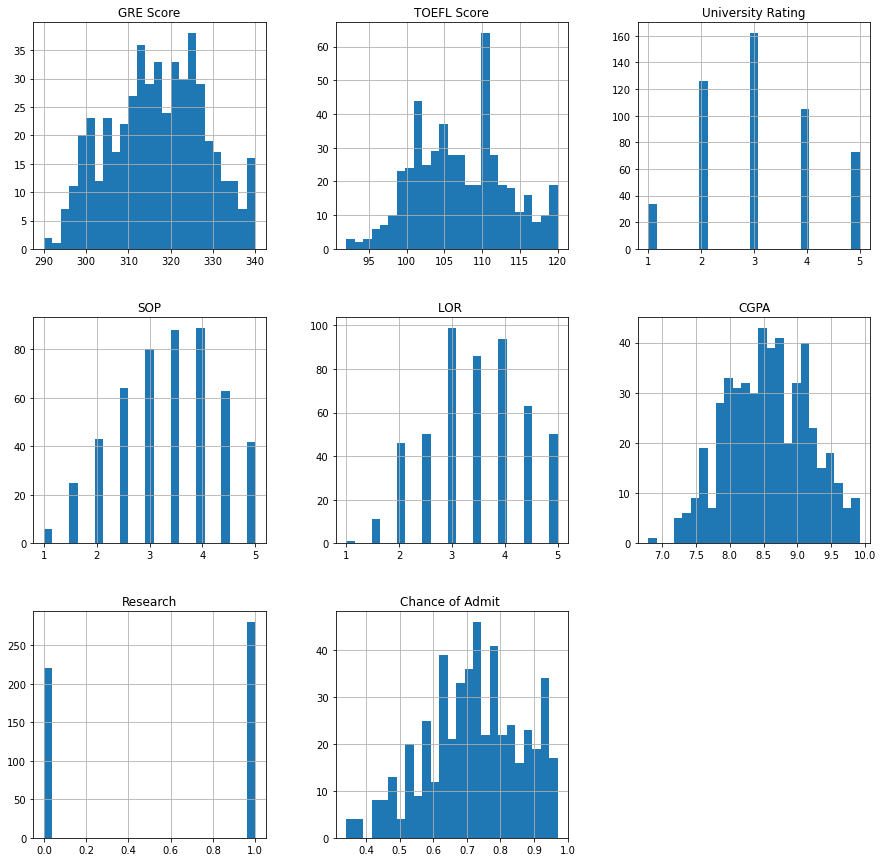

In [4]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [5]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [6]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

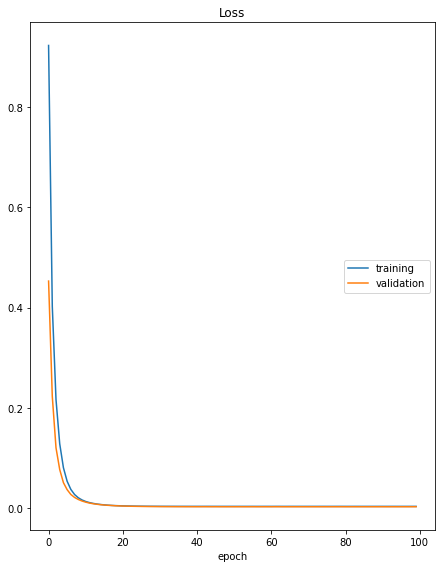

Loss
	training         	 (min:    0.004, max:    0.923, cur:    0.004)
	validation       	 (min:    0.003, max:    0.453, cur:    0.003)
35/35 [==============================] - 1s 21ms/step - loss: 0.0038 - val_loss: 0.0032
El MAE de la Red con 1 Capa es de : 0.04093355598449707
El MSE de la Red con 1 Capa es de : 0.003177876080044353


In [8]:
# Celda 1

# Normalización de variables predictoras (X) con la función StandardScaler
from sklearn.preprocessing import StandardScaler

# Definición de la función StandardScaler
scaler = StandardScaler()
scaler.fit(X)

# Transformación de los set de entrenamiento y test
xTrain_transformed = scaler.transform(xTrain)
xTest_transformed = scaler.transform(xTest)

K.clear_session()

def crear_modelo_unacapa(optimizer='sgd'):
    # Definición red neuronal con la función Sequential()
    model = Sequential()
    # Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
    model.add(Dense(1, input_shape=(xTrain_transformed.shape[1],)))
    # Impresión de la arquitectura de la red neuronal
    print(model.summary())
    # Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Modelo de regresion usando Wrapper
model = KerasRegressor(build_fn=crear_modelo_unacapa, verbose=0)
"""
# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(1, input_shape=(xTrain_transformed.shape[1],)))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error')


# Entrenamiento de la red neuronal con 50 épocas
model.fit(xTrain_transformed, yTrain, 
          verbose=1, 
          epochs=50, 
          validation_data=(xTest_transformed, yTest),
          callbacks=[PlotLossesKeras()])

"""

# define the grid search parameters
batch_size = [10, 50, 100]
epochs = [10, 30, 50, 100]
optimizer = ['sgd','adam']
param_grid = dict(batch_size=batch_size, epochs=epochs, optimizer = optimizers)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)

model_one_layer = grid.fit(xTrain_transformed,
                       yTrain,
                       verbose=1, 
                       validation_data=(xTest_transformed, yTest),
                       callbacks=[PlotLossesKeras()])

# Evaluacion de desempeño
y_pred_onelayer = model_one_layer.predict(xTest_transformed)
mae_onelayer = mean_absolute_error(yTest, y_pred_onelayer)
mse_onelayer = mean_squared_error(yTest, y_pred_onelayer)

print('El MAE de la Red con 1 Capa es de :',mae_onelayer)
print('El MSE de la Red con 1 Capa es de :',mse_onelayer)

In [9]:
model_one_layer.best_params_

{'batch_size': 10, 'epochs': 100, 'optimizer': 'sgd'}

### Procedimiento y Conclusiones

Se crea una red neuronal haciendo uso de la librería Keras de una sola capa. El procedimiento inicia con el escalado y preparación de los datos tanto en los conjuntos de entrenamiento y validación. Después de esto se procede a crear una función que construye la red neuronal y esta se calibra haciendo uso de los Wrappers de Keras y la función GridSearchCV del paquete scikit-learn y se establece un criterio de 5-fold cross validation para los pliegues dentro del conjunto de prueba.

* **Funcion de pérdida**: como función de pérdida se hace uso del MSE dado que el problema es de regresión y esta métrica es la más ampliamente utilizada para evaluar en este tipo de casos.
* **Optimizador**: el optimizador empleado es el algoritmo de 'stochastic gradient descent' cuyo propósito es establecer los pesos óptimos que minimizen la función de costo.
* **Numero de épocas**: el número de épocas elegido en este caso es de 100, este parámetro de las cuatro posibilidades establecidas fue aquel que generó un mejor resultado. Como es posible ver en la gráfica no hay una mejora significativa en el valor del 'loss' a partir de las 20 épocas, por lo tanto también podría sugerirse establecer un número menor para mejorar el desemepeño computacional.

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

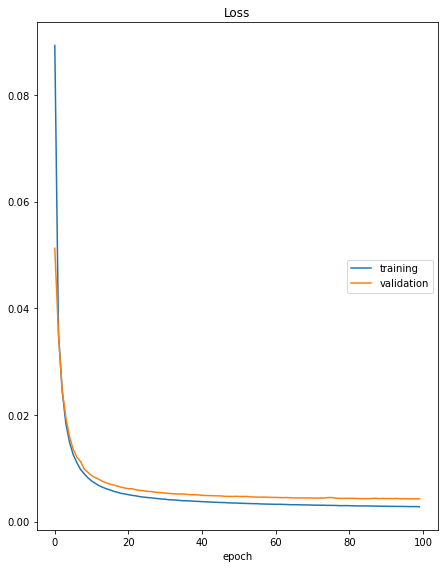

Loss
	training         	 (min:    0.003, max:    0.089, cur:    0.003)
	validation       	 (min:    0.004, max:    0.051, cur:    0.004)
35/35 [==============================] - 1s 24ms/step - loss: 0.0028 - val_loss: 0.0043
El MAE de la Red con 2 Capas es de : 0.04980849839051565
El MSE de la Red con 2 Capas es de : 0.004292708223969108


In [10]:
# Celda 2

K.clear_session()

def crear_modelo_doscapas(optimizer='sgd', neuronas = 1):
    # Definición red neuronal con la función Sequential()
    model1 = Sequential()
    # Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
    model1.add(Dense(neuronas, input_shape=(xTrain_transformed.shape[1],), activation = 'relu'))
    model1.add(Dense(1))
    # Impresión de la arquitectura de la red neuronal
    print(model1.summary())
    # Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
    model1.compile(optimizer=optimizer, loss='mean_squared_error')
    return model1

# Modelo de regresion usando Wrapper
model1 = KerasRegressor(build_fn=crear_modelo_doscapas, verbose=0)

"""
# Modelo de regresion usando Wrapper
model = KerasRegressor(build_fn=crear_modelo_doscapas, verbose=0)

# Definición red neuronal con la función Sequential()
model1 = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model1.add(Dense(256, input_shape=(xTrain_transformed.shape[1],), activation = 'relu'))
model1.add(Dense(1))

# Impresión de la arquitectura de la red neuronal
print(model1.summary())

# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model1.compile(optimizer='sgd', loss='mean_squared_error')

# Entrenamiento de la red neuronal con 50 épocas
model1.fit(xTrain_transformed, yTrain, 
          verbose=1, 
          epochs=50, 
          validation_data=(xTest_transformed, yTest),
          callbacks=[PlotLossesKeras()])

"""

# define the grid search parameters
batch_size = [10, 50]
epochs = [30, 50, 100]
neuronas = [1, 64, 128, 256]
optimizer = ['sgd','adam']
param_grid = dict(batch_size=batch_size, epochs=epochs, neuronas = neuronas, optimizer = optimizer)
grid = GridSearchCV(estimator=model1, param_grid=param_grid, n_jobs=-1, cv=5)

model_two_layer = grid.fit(xTrain_transformed,
                       yTrain,
                       verbose=1, 
                       validation_data=(xTest_transformed, yTest),
                       callbacks=[PlotLossesKeras()])

# Evaluacion de desempeño
y_pred_twolayer = model_two_layer.predict(xTest_transformed)
mae_twolayer = mean_absolute_error(yTest, y_pred_twolayer)
mse_twolayer = mean_squared_error(yTest, y_pred_twolayer)

print('El MAE de la Red con 2 Capas es de :',mae_twolayer)
print('El MSE de la Red con 2 Capas es de :',mse_twolayer)

In [11]:
model_two_layer.best_params_

{'batch_size': 10, 'epochs': 100, 'neuronas': 256, 'optimizer': 'sgd'}

### Procedimiento y Conclusiones

Se crea una red neuronal haciendo uso de la librería Keras de dos capas. Después de esto se procede a crear una función que construye la red neuronal (crear_modelo_doscapas) y esta se calibra del mismo modo que la de una sola capa en el enunciado anterior, haciendo uso de los Wrappers de Keras y la función GridSearchCV del paquete scikit-learn y se establece un criterio de 5-fold cross validation para los pliegues dentro del conjunto de prueba, por efectos de disponibilidad de recurso computacional.

* **Funcion de pérdida**: como función de pérdida se hace uso del MSE dado que el problema es de regresión manteniendo el mismo esquema utilizado en caso anterior.
* **Optimizador**: se empleó el algoritmo adam, el cual tiene también como base el sgd con una configuración adaptativa que debería ser computacionalmente más eficiente, sin embargo pero para el caso descrito el mejor resultado se obtiene al utilizar el 'stochastic gradient descent'.
* **Numero de épocas**: el número de épocas elegido en este caso es de 100, de igual manera que en el caso anterior lo más adecuado sería evaluar una estrategia con menor número de épocas ya que estas no presentan variaciones importantes a partir de la 10 iteración.
* **Numero de neuronas**: el número de neuronas se calibró en un valor de 256 dado que así se obtiene un mejor desemepño en la función de costo del conjunto de entrenamiento. Es de notar que se utilizaron valores de números en base 4 desde 32, porque según algunos autores se beneficia del uso de 'slots' o espacios de memoria binaria como en las tarjetas de los computadores.

*Nota*: a raiz de la estrategia utilizada el tiempo de ejecución de estas líneas de código es de alrededor de 20 minutos, 

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

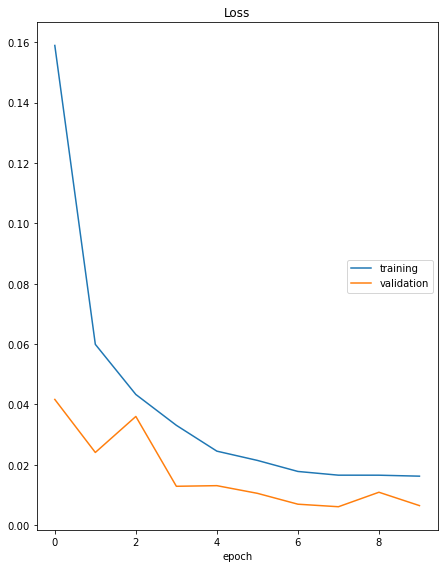

Loss
	training         	 (min:    0.016, max:    0.159, cur:    0.016)
	validation       	 (min:    0.006, max:    0.042, cur:    0.006)
11/11 [==============================] - 1s 48ms/step - loss: 0.0162 - val_loss: 0.0065
Epoch 00010: early stopping
El MAE de la Red con 3 Capas, EarlyStop y Dropout es de : 0.0645477091550827
El MSE de la Red con 3 Capas, EarlyStop y Dropout es de : 0.006458242505058796


In [13]:
# Celda 3
# Importación librerías
from keras.layers import Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

K.clear_session()

def crear_modelo_multicapa(optimizer='sgd', dropout = 0.2, neuronas = 256):
    # Definición red neuronal con la función Sequential()
    model2 = Sequential()
    # Definición de las capas
    model2.add(Dense(neuronas, input_shape=(xTrain_transformed.shape[1],), activation = 'relu'))
    model2.add(Dropout(dropout))
    model2.add(Dense(neuronas,activation='relu'))
    model2.add(Dropout(dropout))
    model2.add(Dense(1))
    # Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
    model2.compile(optimizer=optimizer, loss='mean_squared_error')
    return model2

# Modelo de regresion usando Wrapper
model2 = KerasRegressor(build_fn=crear_modelo_multicapa, verbose=0)

"""
# Definición red neuronal con la función Sequential()
model2 = Sequential()
# Definición de las capas
model2.add(Dense(256, input_shape=(xTrain_transformed.shape[1],), activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(Dense(256,activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1))
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model2.compile(optimizer='sgd', loss='mean_squared_error')

# Impresión de la arquitectura de la red neuronal
print(model2.summary())


model2.fit(xTrain_transformed, yTrain, 
          verbose=True, 
          epochs=50, 
          batch_size=10,
          validation_data=(xTest_transformed, yTest),
          callbacks=[best_model, early_stop,PlotLossesKeras()])
"""
# Definición de la función EarlyStopping para considerar durante el entrenamiento
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

# Definición de la función ModelCheckpoint para guardar el modelo con mejor desempeño
fBestModel = 'best _model.h5'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

# define the grid search parameters
optimizer = ['sgd','adam']
dropout = [0.2,0.5,0.8]
epochs = [30, 50]
param_grid = dict(dropout=dropout, optimizer = optimizer, epochs = epochs)
grid = GridSearchCV(estimator=model2, param_grid=param_grid, n_jobs=-1, cv=5)

# Entrenamiento de la red neuronal con early stopping y dropout
model_multi_layer = grid.fit(xTrain_transformed,
                       yTrain,
                       verbose=1, 
                       validation_data=(xTest_transformed, yTest),
                       callbacks=[best_model, early_stop,PlotLossesKeras()])
                       
# Evaluacion de desempeño
y_pred_multilayer = model_multi_layer.predict(xTest_transformed)
mae_multilayer = mean_absolute_error(yTest, y_pred_multilayer)
mse_multilayer = mean_squared_error(yTest, y_pred_multilayer)

print('El MAE de la Red con 3 Capas, EarlyStop y Dropout es de :',mae_multilayer)
print('El MSE de la Red con 3 Capas, EarlyStop y Dropout es de :',mse_multilayer)

In [14]:
model_multi_layer.best_params_

{'dropout': 0.2, 'epochs': 30, 'optimizer': 'adam'}

### Procedimiento y Conclusiones

Se crea una red neuronal haciendo uso de la librería Keras multicapa. En esta se hace uso de la metodología Dropout, la cual establece que se eliminará un porcentaje de las neuronas que existen en la capa en conjunto con el early stopping indicando que si no hay un cambio significativo en los resultados obtenidos de la funcion de costo por dos epocas consectuvias, se debería detener el entrenamiento. Para efectos de calibración se usaron los mejores parámetros de la red de dos capas que se analizó anteriormente.

* **Funcion de pérdida**: se sigue usando el MSE para evaluar el performance en el modelo de regresión.
* **Optimizador**: el algoritmo de adam ha dado el mejor resultado para la predicción de probabilidad de ingreso a la universidad, contrario a lo obtenido en las redes construidas anteriormente.
* **Numero de épocas**: con 30 epochas el modelo tiene suficiente holgura para encontrar una variación en la función de pérdida que sea aceptable para detener el entrenamiento.
* **Numero de neuronas**: se hace uso de 256 neuronas para las capas ocultas de la red, tomando como insumo los resultados obte nidos en el modelo inmediatamente anterior, si bien puede existir una diferencia con las características actuales dado que este modelo de red tiene una capa adicional y existen otros elementos nuevos como el early stopping y el dropout, por cuestiones de disponibilidad de máquina para la calibración de parámetros se decidió no calibrar el valor exacto de neuronas.
* **Dropout**: uno de los parametros de calibración era el porcentaje de 'perdida' de neuronas dentro de las capas de la red neuronal. Como resultado se obtiene que con un 20% de estas que se omitan en el proceso de entrenamiento se obtiene el mejor desempeño.
* **Early Stop**: como criterio de parada se establece que si hay dos epocas consecutivas sin que exista mejora en el valor de la función de costo, entonces se debe detener el modelo.

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

,MAE,MSE
Red 1 Capa,0.040934,0.003178
Red 2 Capas,0.049808,0.004293
Red Multicapa,0.064548,0.006458


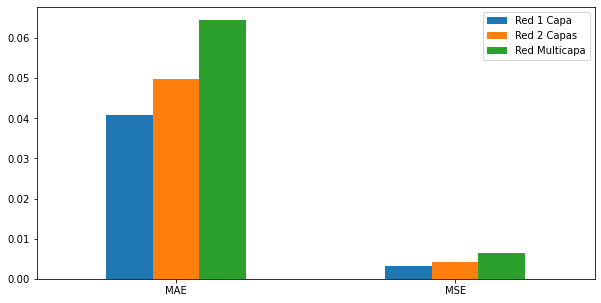

In [25]:
# Celda 4

import seaborn as sns

results_df = pd.DataFrame({'MAE':[mae_onelayer,mae_twolayer,mae_multilayer],
                           'MSE':[mse_onelayer,mse_twolayer,mse_multilayer]},
                         index = ['Red 1 Capa','Red 2 Capas','Red Multicapa'])


ax = results_df.T.plot.bar(rot=0, figsize=(10,5))
plt.legend(bbox_to_anchor=(1.0, 1.0))

results_df

### Conclusiones, ventajas y desventajas

En el gráfico de barras es posible apreciar que el mejor desempeño en la muestra de validación (test) se obtiene para la red neuronal de 1 sola capa, la cual obtiene un MSE de 0.0031 y un MAE de 0.04093. Comparativamente se tiene que los modelos de una sola capa y dos capas se construyeron haciendo uso del algoritomo de 'stochastic gradiente descend' mientras que para el modelo  de multicapa, el mejor resultado se obtuvo calibrando con el algoritmo de 'adam'.

* *Desventajas del modelo con menor desempeño*

El modelo multicapa es más errático que los modelos anteriormente construidos, así mismo el criterio de parada basado en early stopping si bien puede reducir la carga computacional del entrenamiento puede inducir a quedarse en un óptimo local sin ser necesariamente la mejor solución posible. El principio de dropout debería ayudar a minimizar el sobreajuste sin embargo al 'esconder' ciertas neuronas del entrenamiento se aumenta la aleatoriedad de la función de salida y por lo tanto se obtienen resultados dispersos.

* *Ventajas del mdelo con mayor desempeño*

El modelo de una sola capa es el más simple de construir, tiene el menor tiempo de entrenamiento, su calibración de párametros es menos compleja que las de las redes que tienen una mayor profundidad en sus capas. Para el caso de estudio dados los resultados obtenidos no amerita emplear modelos más complejos y con técnicas más avanzadas para obtener una predicción más acertada.
